# Algoritmo Genetico per la risoluzione del problema di "Pompei Orienteering"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:
import sys
import matplotlib
libraries = (('Matplotlib', matplotlib), ('Numpy', np))

print("Python Version:", sys.version, '\n')
for lib in libraries:
    print('{0} Version: {1}'.format(lib[0], lib[1].__version__))

Python Version: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)] 

Matplotlib Version: 3.4.3
Numpy Version: 1.20.3


{'Anfiteatro di Pompei': (40.751212, 14.4952145), 'Palestra Grande': (40.75072, 14.49405), 'Porta Nocera': (40.7495633, 14.4934226), 'Orto dei Fuggiaschi': (40.7494165, 14.4928842), 'Casa della Nave Europa': (40.75052, 14.49191)}


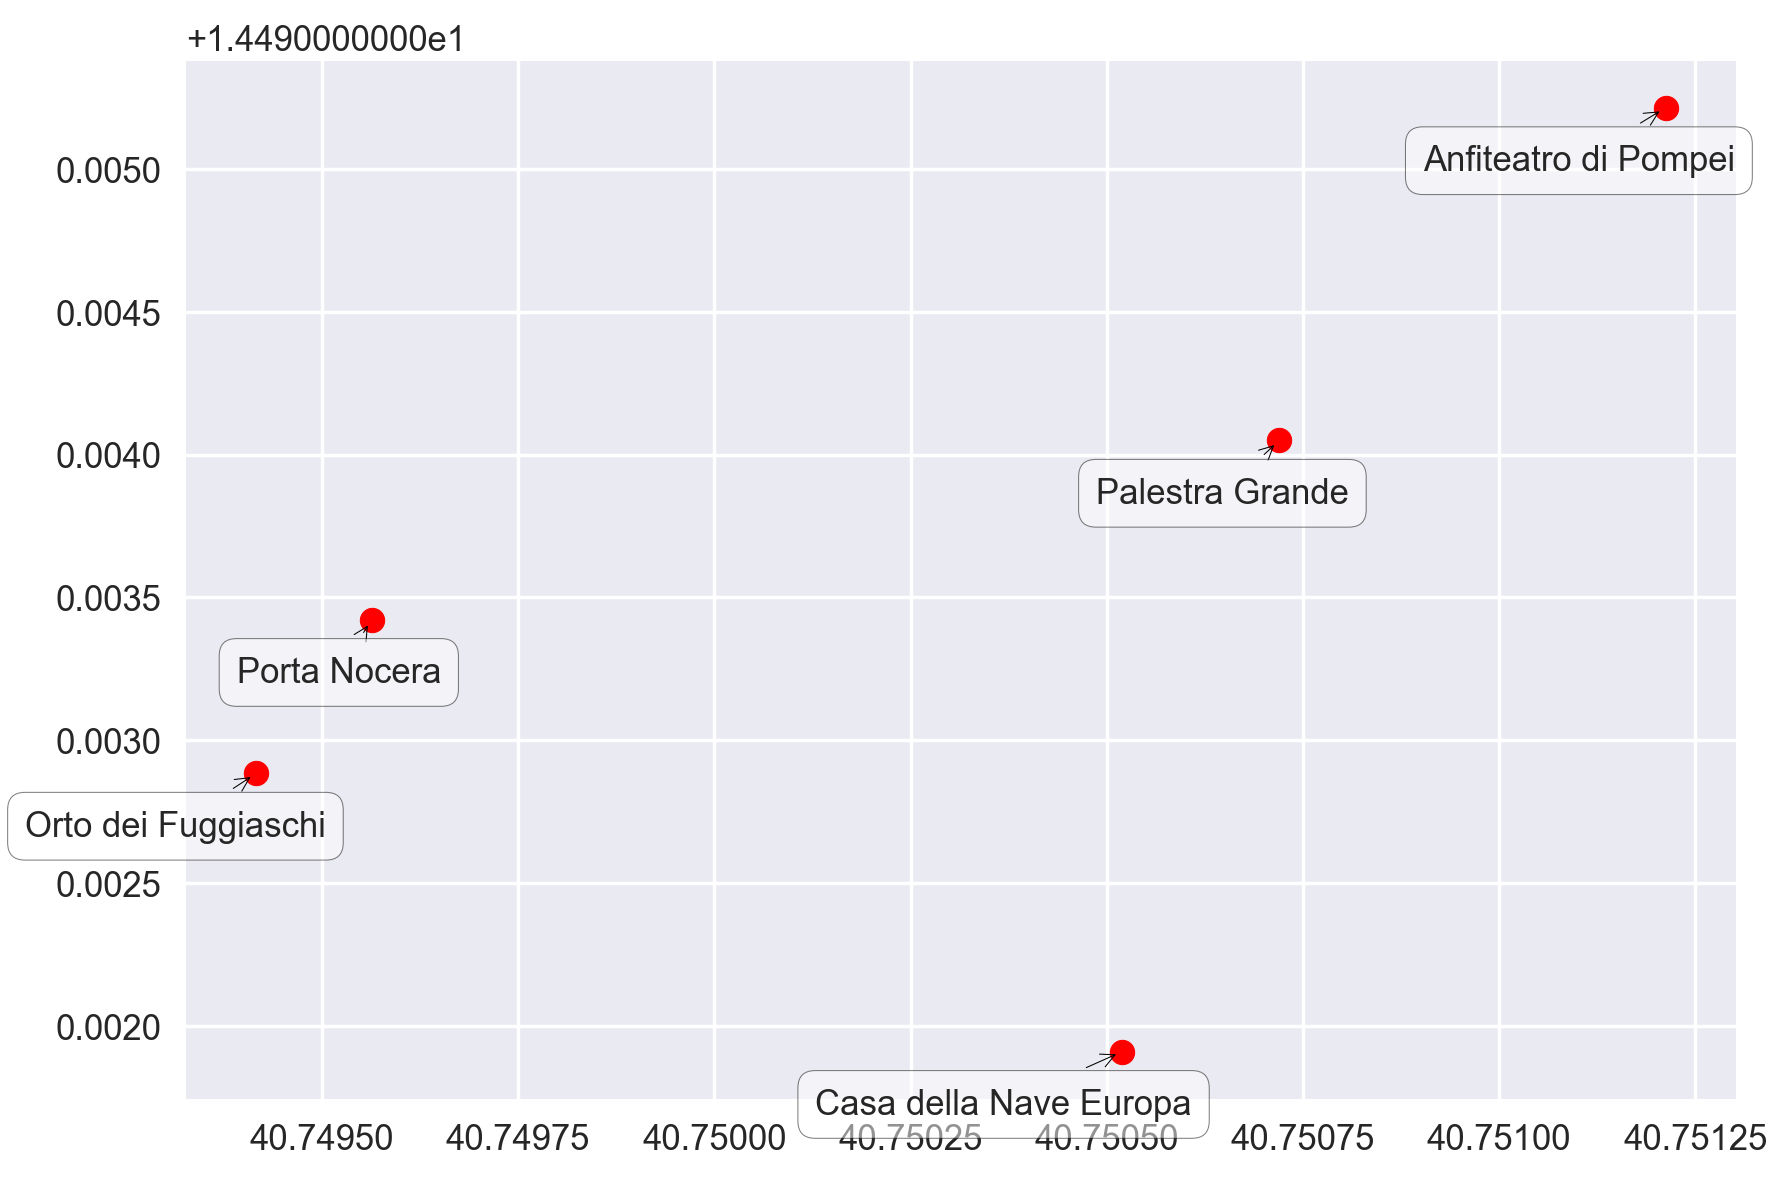

In [3]:
import pandas as pd

np.random.seed(52)

def make_cities(number_of_cities):
    """
    Creates a series of cities by generating X, Y coordinates for
    each city and storing it in a dictionary for later lookup.
    """
    
    col_list = ["DESCRIZIONE", "LATITUDINE", "LONGITUDINE"]
    df = pd.read_csv('Scavi di Pompei-Siti archeologici.csv', usecols=col_list)

    siti = []
    city_coordinates = {}
    score = {}
    for i in range(number_of_cities):
        sito = df['DESCRIZIONE'][i]
        siti.append(sito)
        city_coordinates[sito] = (float(df['LATITUDINE'][i]), float(df['LONGITUDINE'][i]))
        score[sito] = np.random.randint(1,50)
        
    return city_coordinates

city_coordinates = make_cities(5)
print(city_coordinates)

def plot_cities(city_coordinates, annotate=True):
    """
    Makes a plot of all cities.
    Input: city_coordinates; dictionary of all cities and their coordinates in (x,y) format
    """
    names = []
    x = []
    y = []
    plt.figure(dpi=250)
    for ix, coord in city_coordinates.items():
        names.append(ix)
        x.append(coord[0])
        y.append(coord[1])
        if annotate:
            plt.annotate(ix, xy=(coord[0], coord[1]), xytext=(20, -20),
                        textcoords='offset points', ha='right', va='bottom',
                        bbox=dict(boxstyle='round,pad=0.5', fc='w', alpha=0.5),
                        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    plt.scatter(x,y,c='r',marker='o')
            
plot_cities(city_coordinates)

In [4]:
print(list(city_coordinates.keys()))

['Anfiteatro di Pompei', 'Palestra Grande', 'Porta Nocera', 'Orto dei Fuggiaschi', 'Casa della Nave Europa']


In [5]:
from copy import copy
def create_guess(cities):
    """
    Creates a possible path between all cities, returning to the original.
    Input: List of City IDs
    """
    guess = copy(cities)
    np.random.shuffle(guess)
    guess.append(guess[0])
    return list(guess)

create_guess(list(city_coordinates.keys()))

['Orto dei Fuggiaschi',
 'Palestra Grande',
 'Porta Nocera',
 'Anfiteatro di Pompei',
 'Casa della Nave Europa',
 'Orto dei Fuggiaschi']

['Palestra Grande', 'Anfiteatro di Pompei', 'Orto dei Fuggiaschi', 'Casa della Nave Europa', 'Porta Nocera', 'Palestra Grande']


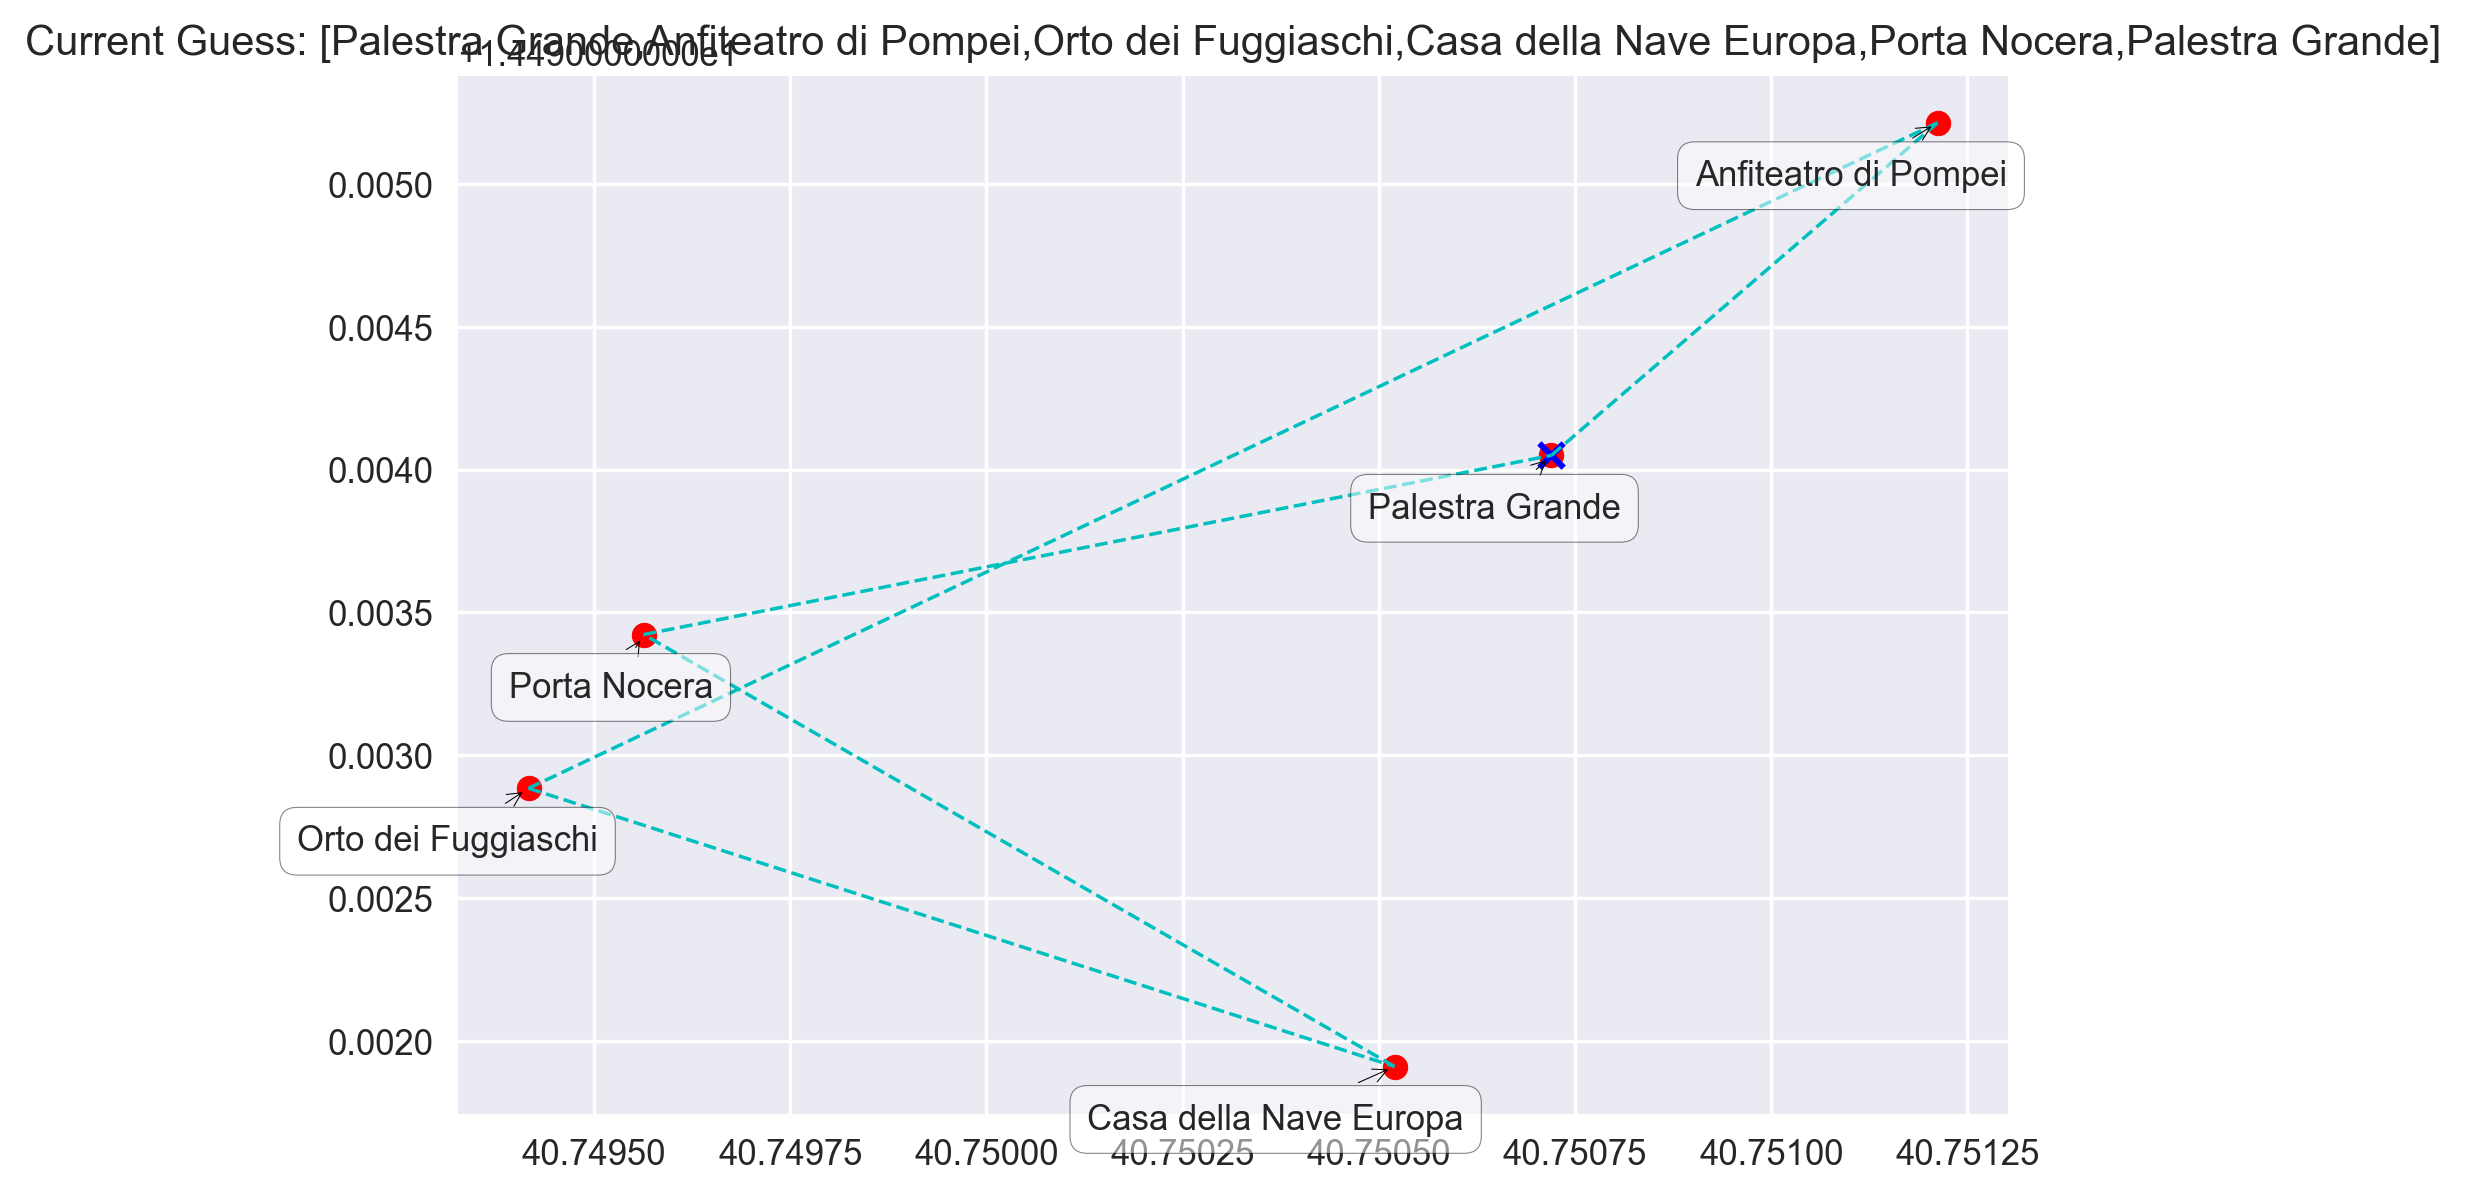

In [6]:
def plot_guess(city_coordinates, guess, guess_in_title=True):
    """
    Takes the coordinates of the cities and the guessed path and
    makes a plot connecting the cities in the guessed order
    Input:
    city_coordinate: dictionary of city id, (x,y)
    guess: list of ids in order
    """
    plot_cities(city_coordinates)
    for ix, current_city in enumerate(guess[:-1]):
        x = [city_coordinates[guess[ix]][0],city_coordinates[guess[ix+1]][0]]
        y = [city_coordinates[guess[ix]][1],city_coordinates[guess[ix+1]][1]]
        plt.plot(x,y,'c--',lw=1)
    plt.scatter(city_coordinates[guess[0]][0],city_coordinates[guess[0]][1], marker='x', c='b')   
    if guess_in_title:
        plt.title("Current Guess: [%s]"%(','.join([str(x) for x in guess])))
    else:
        print("Current Guess: [%s]"%(','.join([str(x) for x in guess])))
    
path = create_guess(list(city_coordinates.keys()))
print(path)
plot_guess(city_coordinates, path)

In [7]:
def create_generation(cities, population=100):
    """
    Makes a list of guessed city orders given a list of city IDs.
    Input:
    cities: list of city ids
    population: how many guesses to make
    """
    generation = [create_guess(cities) for _ in range(population)]
    return generation

test_generation = create_generation(list(city_coordinates.keys()), population=10)
print(test_generation)

[['Anfiteatro di Pompei', 'Palestra Grande', 'Porta Nocera', 'Orto dei Fuggiaschi', 'Casa della Nave Europa', 'Anfiteatro di Pompei'], ['Anfiteatro di Pompei', 'Porta Nocera', 'Orto dei Fuggiaschi', 'Palestra Grande', 'Casa della Nave Europa', 'Anfiteatro di Pompei'], ['Casa della Nave Europa', 'Porta Nocera', 'Anfiteatro di Pompei', 'Orto dei Fuggiaschi', 'Palestra Grande', 'Casa della Nave Europa'], ['Porta Nocera', 'Anfiteatro di Pompei', 'Casa della Nave Europa', 'Palestra Grande', 'Orto dei Fuggiaschi', 'Porta Nocera'], ['Palestra Grande', 'Porta Nocera', 'Casa della Nave Europa', 'Anfiteatro di Pompei', 'Orto dei Fuggiaschi', 'Palestra Grande'], ['Anfiteatro di Pompei', 'Orto dei Fuggiaschi', 'Palestra Grande', 'Casa della Nave Europa', 'Porta Nocera', 'Anfiteatro di Pompei'], ['Anfiteatro di Pompei', 'Palestra Grande', 'Porta Nocera', 'Casa della Nave Europa', 'Orto dei Fuggiaschi', 'Anfiteatro di Pompei'], ['Anfiteatro di Pompei', 'Palestra Grande', 'Casa della Nave Europa', 'O

In [8]:
print(city_coordinates)

{'Anfiteatro di Pompei': (40.751212, 14.4952145), 'Palestra Grande': (40.75072, 14.49405), 'Porta Nocera': (40.7495633, 14.4934226), 'Orto dei Fuggiaschi': (40.7494165, 14.4928842), 'Casa della Nave Europa': (40.75052, 14.49191)}


In [9]:
def distance_between_cities(city1_id, city2_id):
    """
    Given two cities, this calculates this distance between them
    """
    c1 = city_coordinates[city1_id]
    c2 = city_coordinates[city2_id]
    distance = np.sqrt((c1[0]-c2[0])**2 + (c1[1]-c2[1])**2)
    return distance

def fitness_score(guess):
    """
    Loops through the cities in the guesses order and calculates
    how much distance the path would take to complete a loop.
    Lower is better.
    """
    score = 0
    for ix, city_id in enumerate(guess[:-1]):
        score += distance_between_cities(city_id, guess[ix+1])
    return score

def check_fitness(guesses):
    """
    Goes through every guess and calculates the fitness score. 
    Returns a list of tuples: (guess, fitness_score)
    """
    fitness_indicator = []
    for guess in guesses:
        fitness_indicator.append((guess, fitness_score(guess)))
    return fitness_indicator

print(check_fitness(test_generation))

[(['Anfiteatro di Pompei', 'Palestra Grande', 'Porta Nocera', 'Orto dei Fuggiaschi', 'Casa della Nave Europa', 'Anfiteatro di Pompei'], 0.007986298015219493), (['Anfiteatro di Pompei', 'Porta Nocera', 'Orto dei Fuggiaschi', 'Palestra Grande', 'Casa della Nave Europa', 'Anfiteatro di Pompei'], 0.010267308317750062), (['Casa della Nave Europa', 'Porta Nocera', 'Anfiteatro di Pompei', 'Orto dei Fuggiaschi', 'Palestra Grande', 'Casa della Nave Europa'], 0.011064621173781358), (['Porta Nocera', 'Anfiteatro di Pompei', 'Casa della Nave Europa', 'Palestra Grande', 'Orto dei Fuggiaschi', 'Porta Nocera'], 0.010267308317750062), (['Palestra Grande', 'Porta Nocera', 'Casa della Nave Europa', 'Anfiteatro di Pompei', 'Orto dei Fuggiaschi', 'Palestra Grande'], 0.011172394034948376), (['Anfiteatro di Pompei', 'Orto dei Fuggiaschi', 'Palestra Grande', 'Casa della Nave Europa', 'Porta Nocera', 'Anfiteatro di Pompei'], 0.011064621173781356), (['Anfiteatro di Pompei', 'Palestra Grande', 'Porta Nocera', '

Ora dobbiamo impostare un programma di allevamento. Quindi cosa comporta? Non possiamo prendere città casuali da ogni genitore, potremmo avere la stessa città due volte. Quindi, invece, prenderemo un insieme casuale di città dal genitore 1 e le terremo in posizione. Quindi compila bene con le città del genitore 2, andando da sinistra a destra e assicurandoti che non si verifichino duplicati.

In [10]:
def get_breeders_from_generation(guesses, take_best_N=10, take_random_N=5, verbose=False, mutation_rate=0.1):
    """
    This sets up the breeding group for the next generation. You have
    to be very careful how many breeders you take, otherwise your
    population can explode. These two, plus the "number of children per couple"
    in the make_children function must be tuned to avoid exponential growth or decline!
    """
    # First, get the top guesses from last time
    fit_scores = check_fitness(guesses)
    sorted_guesses = sorted(fit_scores, key=lambda x: x[1]) # sorts so lowest is first, which we want
    new_generation = [x[0] for x in sorted_guesses[:take_best_N]]
    best_guess = new_generation[0]
    
    if verbose:
        # If we want to see what the best current guess is!
        print(best_guess)
    
    # Second, get some random ones for genetic diversity
    for _ in range(take_random_N):
        ix = np.random.randint(len(guesses))
        new_generation.append(guesses[ix])
        
    # No mutations here since the order really matters.
    # If we wanted to, we could add a "swapping" mutation,
    # but in practice it doesn't seem to be necessary
    
    np.random.shuffle(new_generation)
    return new_generation, best_guess

def make_child(parent1, parent2):
    """ 
    Take some values from parent 1 and hold them in place, then merge in values
    from parent2, filling in from left to right with cities that aren't already in 
    the child. 
    """
    list_of_ids_for_parent1 = list(np.random.choice(list(city_coordinates.keys()), replace=False, size=len(city_coordinates)//2))
    child = [-99 for _ in parent1]
    
    for ix in range(0, len(list_of_ids_for_parent1)):
        child[ix] = parent1[ix]
    for ix, gene in enumerate(child):
        if gene == -99:
            for gene2 in parent2:
                if gene2 not in child:
                    child[ix] = gene2
                    break
    child[-1] = child[0]
    return child

def make_children(old_generation, children_per_couple=1):
    """
    Pairs parents together, and makes children for each pair. 
    If there are an odd number of parent possibilities, one 
    will be left out. 
    
    Pairing happens by pairing the first and last entries. 
    Then the second and second from last, and so on.
    """
    mid_point = len(old_generation)//2
    next_generation = [] 
    
    for ix, parent in enumerate(old_generation[:mid_point]):
        for _ in range(children_per_couple):
            next_generation.append(make_child(parent, old_generation[-ix-1]))
    return next_generation

In [11]:
count=0
list1 = []
list2 = []
for i in city_coordinates.keys():
    count+=1
    if count <=26:
        list1.append(i)
    else:
        list2.append(i)

make_child(list1,list2)

['Anfiteatro di Pompei', 'Palestra Grande', -99, -99, 'Anfiteatro di Pompei']

Diamo un'occhiata a un ciclo di test con il nostro test_generation.

In [12]:
breeders, _ = get_breeders_from_generation(test_generation)
print(breeders)

[['Casa della Nave Europa', 'Porta Nocera', 'Anfiteatro di Pompei', 'Orto dei Fuggiaschi', 'Palestra Grande', 'Casa della Nave Europa'], ['Palestra Grande', 'Porta Nocera', 'Casa della Nave Europa', 'Anfiteatro di Pompei', 'Orto dei Fuggiaschi', 'Palestra Grande'], ['Porta Nocera', 'Anfiteatro di Pompei', 'Casa della Nave Europa', 'Palestra Grande', 'Orto dei Fuggiaschi', 'Porta Nocera'], ['Anfiteatro di Pompei', 'Porta Nocera', 'Orto dei Fuggiaschi', 'Palestra Grande', 'Casa della Nave Europa', 'Anfiteatro di Pompei'], ['Orto dei Fuggiaschi', 'Palestra Grande', 'Porta Nocera', 'Anfiteatro di Pompei', 'Casa della Nave Europa', 'Orto dei Fuggiaschi'], ['Orto dei Fuggiaschi', 'Palestra Grande', 'Porta Nocera', 'Anfiteatro di Pompei', 'Casa della Nave Europa', 'Orto dei Fuggiaschi'], ['Anfiteatro di Pompei', 'Palestra Grande', 'Porta Nocera', 'Orto dei Fuggiaschi', 'Casa della Nave Europa', 'Anfiteatro di Pompei'], ['Anfiteatro di Pompei', 'Porta Nocera', 'Orto dei Fuggiaschi', 'Palestra 

In [13]:
print(make_children(breeders, children_per_couple=2))

[['Casa della Nave Europa', 'Porta Nocera', 'Anfiteatro di Pompei', 'Palestra Grande', 'Orto dei Fuggiaschi', 'Casa della Nave Europa'], ['Casa della Nave Europa', 'Porta Nocera', 'Anfiteatro di Pompei', 'Palestra Grande', 'Orto dei Fuggiaschi', 'Casa della Nave Europa'], ['Palestra Grande', 'Porta Nocera', 'Orto dei Fuggiaschi', 'Casa della Nave Europa', 'Anfiteatro di Pompei', 'Palestra Grande'], ['Palestra Grande', 'Porta Nocera', 'Orto dei Fuggiaschi', 'Casa della Nave Europa', 'Anfiteatro di Pompei', 'Palestra Grande'], ['Porta Nocera', 'Anfiteatro di Pompei', 'Palestra Grande', 'Casa della Nave Europa', 'Orto dei Fuggiaschi', 'Porta Nocera'], ['Porta Nocera', 'Anfiteatro di Pompei', 'Palestra Grande', 'Casa della Nave Europa', 'Orto dei Fuggiaschi', 'Porta Nocera'], ['Anfiteatro di Pompei', 'Porta Nocera', 'Orto dei Fuggiaschi', 'Palestra Grande', 'Casa della Nave Europa', 'Anfiteatro di Pompei'], ['Anfiteatro di Pompei', 'Porta Nocera', 'Orto dei Fuggiaschi', 'Palestra Grande', 

Ottimo, sembra che i lineamenti dei nostri genitori vengano mantenuti, ma non vengano copiati direttamente. Quindi tutto sta andando come speravamo per ora. Ora proviamo a risolvere effettivamente il problema lasciando che accadano molte generazioni e mostrando quante ipotesi ci sono nella generazione iniziale.

In [14]:
current_generation = create_generation(list(city_coordinates.keys()),population=500)
print_every_n_generations = 5

for i in range(100):
    if not i % print_every_n_generations:
        print("Generation %i: "%i, end='')
        print(len(current_generation))
        is_verbose = True
    else:
        is_verbose = False
    breeders, best_guess = get_breeders_from_generation(current_generation, 
                                                        take_best_N=250, take_random_N=100, 
                                                        verbose=is_verbose)
    current_generation = make_children(breeders, children_per_couple=3)
    

Generation 0: 500
['Orto dei Fuggiaschi', 'Porta Nocera', 'Anfiteatro di Pompei', 'Palestra Grande', 'Casa della Nave Europa', 'Orto dei Fuggiaschi']
Generation 5: 525
['Anfiteatro di Pompei', 'Palestra Grande', 'Casa della Nave Europa', 'Orto dei Fuggiaschi', 'Porta Nocera', 'Anfiteatro di Pompei']
Generation 10: 525
['Orto dei Fuggiaschi', 'Casa della Nave Europa', 'Palestra Grande', 'Anfiteatro di Pompei', 'Porta Nocera', 'Orto dei Fuggiaschi']
Generation 15: 525
['Porta Nocera', 'Orto dei Fuggiaschi', 'Casa della Nave Europa', 'Palestra Grande', 'Anfiteatro di Pompei', 'Porta Nocera']
Generation 20: 525
['Orto dei Fuggiaschi', 'Casa della Nave Europa', 'Palestra Grande', 'Anfiteatro di Pompei', 'Porta Nocera', 'Orto dei Fuggiaschi']
Generation 25: 525
['Anfiteatro di Pompei', 'Porta Nocera', 'Orto dei Fuggiaschi', 'Casa della Nave Europa', 'Palestra Grande', 'Anfiteatro di Pompei']
Generation 30: 525
['Anfiteatro di Pompei', 'Porta Nocera', 'Orto dei Fuggiaschi', 'Casa della Nave E

Mettiamolo in una funzione in modo da poterlo ripetere con diversi insiemi di cose.

In [15]:
def evolve_to_solve(current_generation, max_generations, take_best_N, take_random_N,
                    mutation_rate, children_per_couple, print_every_n_generations, verbose=False):
    """
    Takes in a generation of guesses then evolves them over time using our breeding rules.
    Continue this for "max_generations" times.
    Inputs:
    current_generation: The first generation of guesses
    max_generations: how many generations to complete
    take_best_N: how many of the top performers get selected to breed
    take_random_N: how many random guesses get brought in to keep genetic diversity
    mutation_rate: How often to mutate (currently unused)
    children_per_couple: how many children per breeding pair
    print_every_n_geneartions: how often to print in verbose mode
    verbose: Show printouts of progress
    Returns:
    fitness_tracking: a list of the fitness score at each generations
    best_guess: the best_guess at the end of evolution
    """
    fitness_tracking = []
    for i in range(max_generations):
        if verbose and not i % print_every_n_generations and i > 0:
            print("Generation %i: "%i, end='')
            print(len(current_generation))
            print("Current Best Score: ", fitness_tracking[-1])
            is_verbose = True
        else:
            is_verbose = False
        breeders, best_guess = get_breeders_from_generation(current_generation, 
                                                            take_best_N=take_best_N, take_random_N=take_random_N, 
                                                            verbose=is_verbose, mutation_rate=mutation_rate)
        fitness_tracking.append(fitness_score(best_guess))
        current_generation = make_children(breeders, children_per_couple=children_per_couple)
    
    return fitness_tracking, best_guess

current_generation = create_generation(list(city_coordinates.keys()),population=500)
fitness_tracking, best_guess = evolve_to_solve(current_generation, 100, 150, 70, 0.5, 3, 5, verbose=True)

Generation 5: 330
Current Best Score:  0.007878525154052473
['Porta Nocera', 'Orto dei Fuggiaschi', 'Casa della Nave Europa', 'Palestra Grande', 'Anfiteatro di Pompei', 'Porta Nocera']
Generation 10: 330
Current Best Score:  0.007878525154052473
['Palestra Grande', 'Anfiteatro di Pompei', 'Porta Nocera', 'Orto dei Fuggiaschi', 'Casa della Nave Europa', 'Palestra Grande']
Generation 15: 330
Current Best Score:  0.007878525154052473
['Palestra Grande', 'Anfiteatro di Pompei', 'Porta Nocera', 'Orto dei Fuggiaschi', 'Casa della Nave Europa', 'Palestra Grande']
Generation 20: 330
Current Best Score:  0.007878525154052473
['Palestra Grande', 'Anfiteatro di Pompei', 'Porta Nocera', 'Orto dei Fuggiaschi', 'Casa della Nave Europa', 'Palestra Grande']
Generation 25: 330
Current Best Score:  0.007878525154052473
['Palestra Grande', 'Anfiteatro di Pompei', 'Porta Nocera', 'Orto dei Fuggiaschi', 'Casa della Nave Europa', 'Palestra Grande']
Generation 30: 330
Current Best Score:  0.00787852515405247

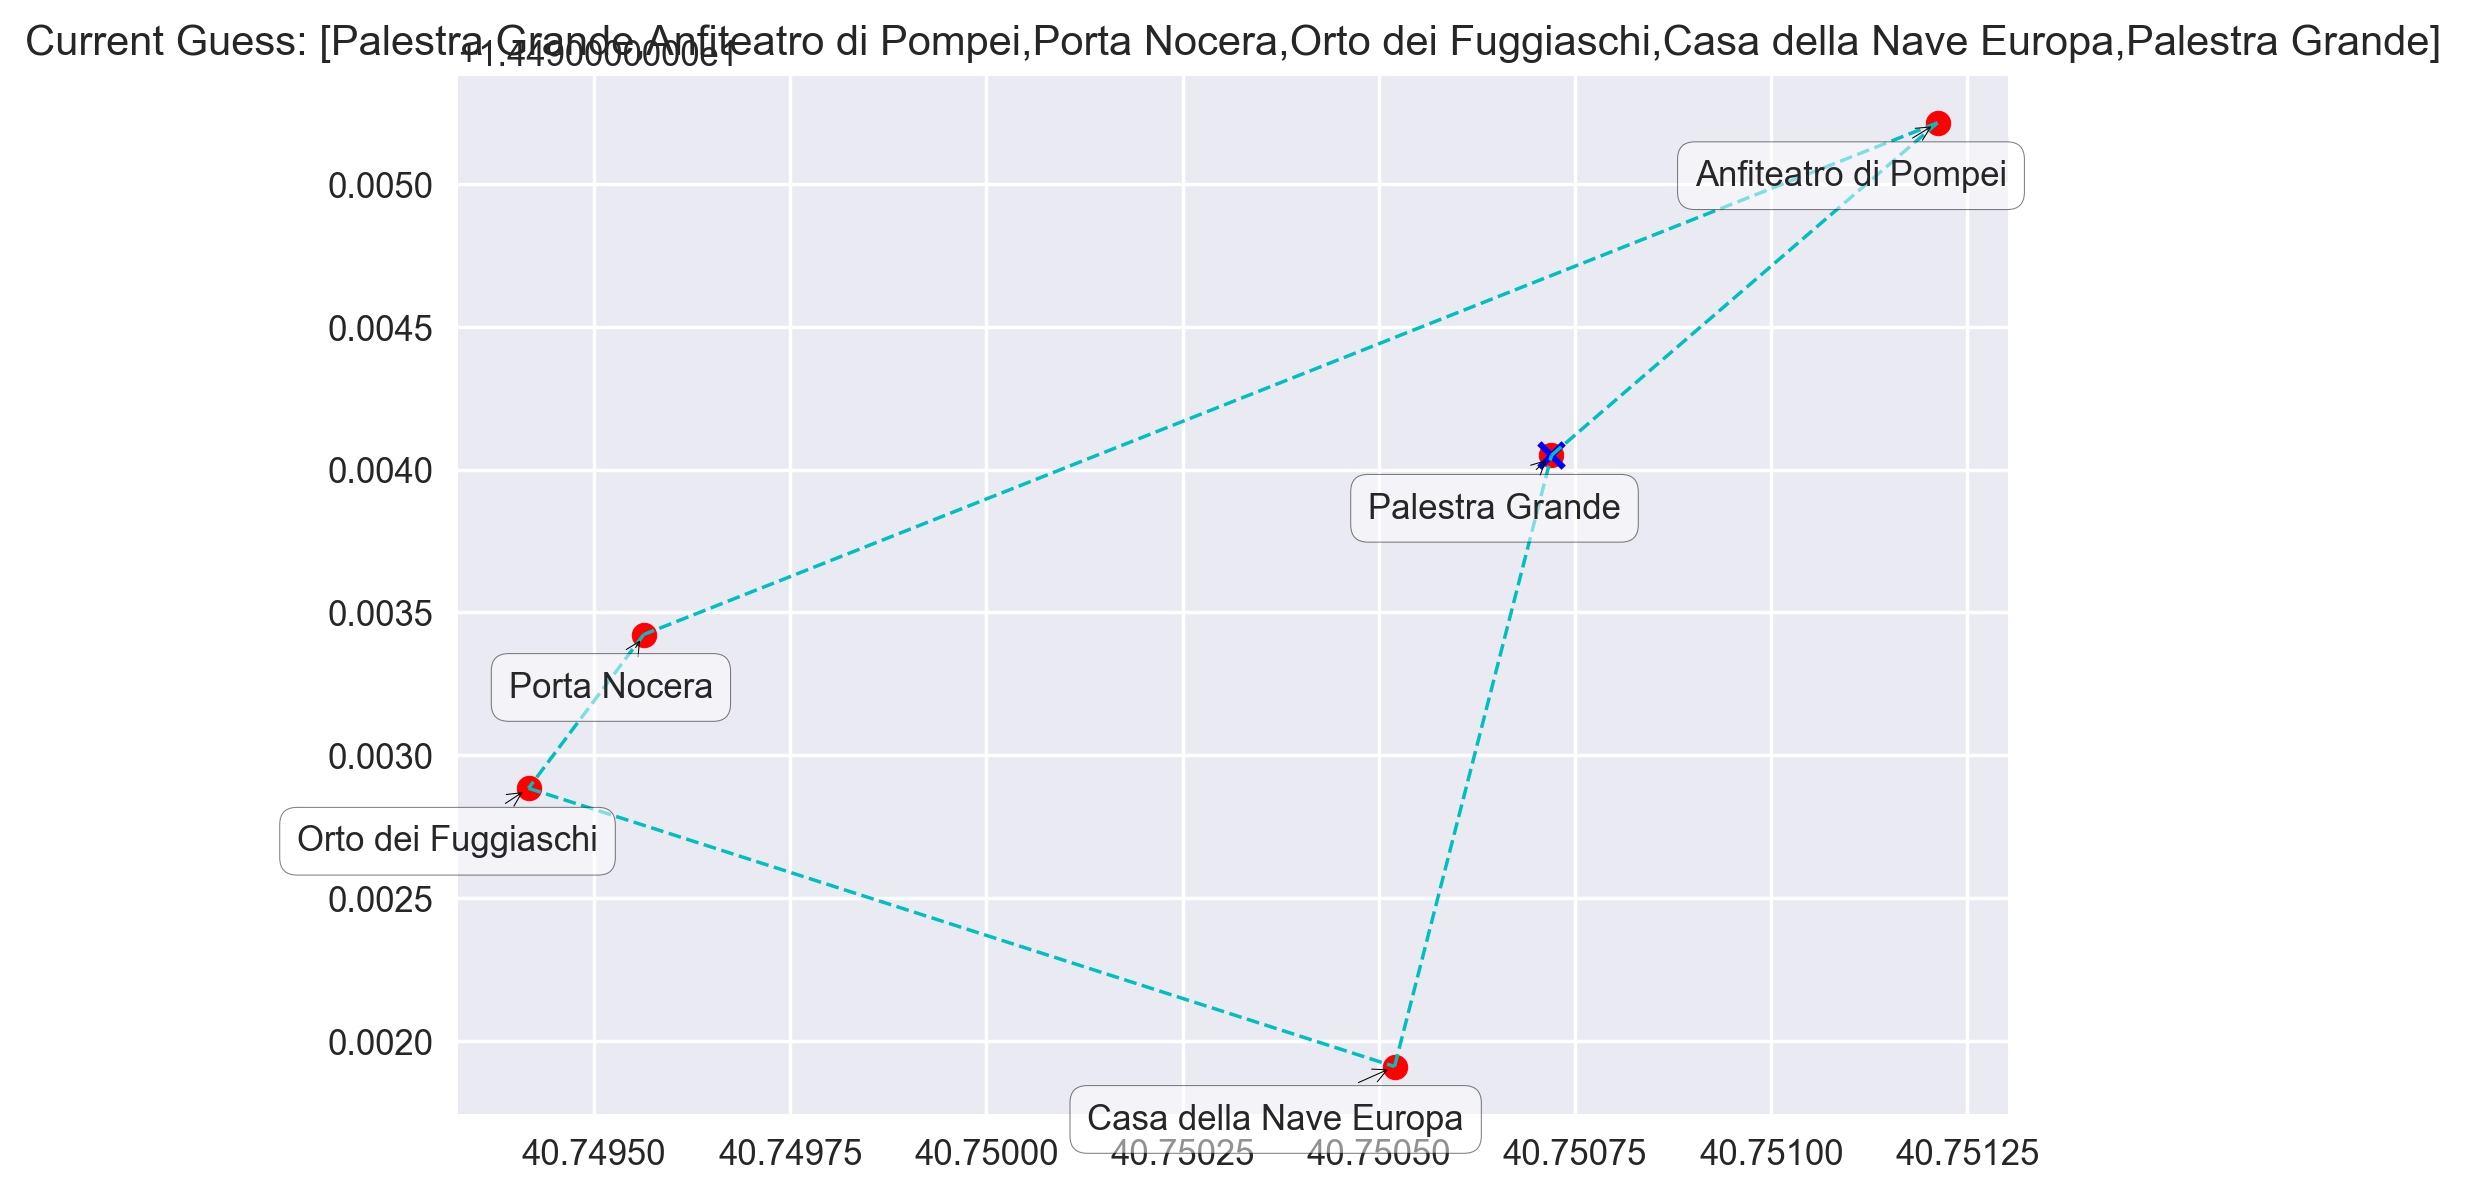

In [16]:
plot_guess(city_coordinates, best_guess)

Sembra che la nostra trama di fitness sarà davvero noiosa poiché ha ottenuto la risposta VERAMENTE velocemente. Questo perché questo è un problema semplice con solo 5 città. Controlliamo comunque.

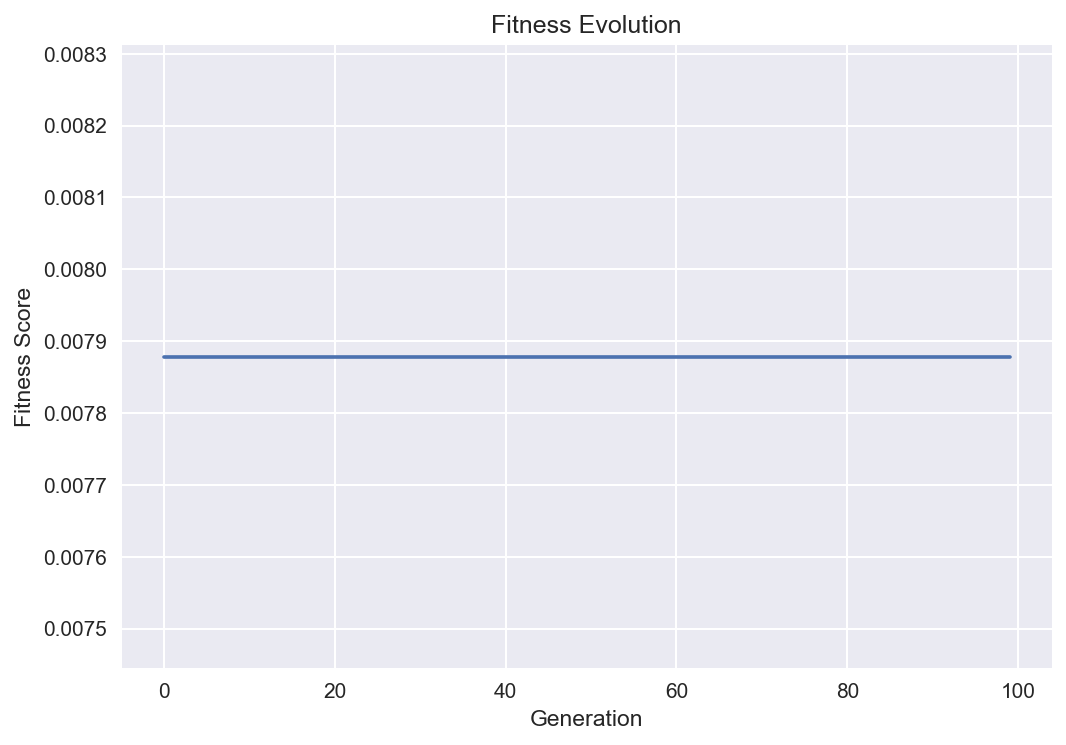

In [17]:
def make_fitness_tracking_plot(fitness_tracking):
    """
    Given a list of fitness scores, plot it versus the generation number
    """
    plt.figure(dpi=150)
    plt.plot(range(len(fitness_tracking)), fitness_tracking)
    plt.ylabel("Fitness Score")
    plt.xlabel("Generation")
    plt.title("Fitness Evolution");

make_fitness_tracking_plot(fitness_tracking)

## Ora proviamolo con un problema più grande e impegnativo

Nel problema di cui sopra c'erano solo 5! permutazioni consentite. Sono solo 120 combinazioni uniche ed è abbastanza facile da risolvere. Tuttavia, se abbiamo 20 città... ce ne sono 20! = 2.432902e+18 permutazioni possibili. Questo è praticamente fuori dal regno delle possibilità per la forza bruta. Quindi vediamo se riusciamo a ottenere una risposta decente in un lasso di tempo utilizzabile. Questo dovrebbe anche farci vedere un comportamento più interessante nella nostra funzione di fitness.

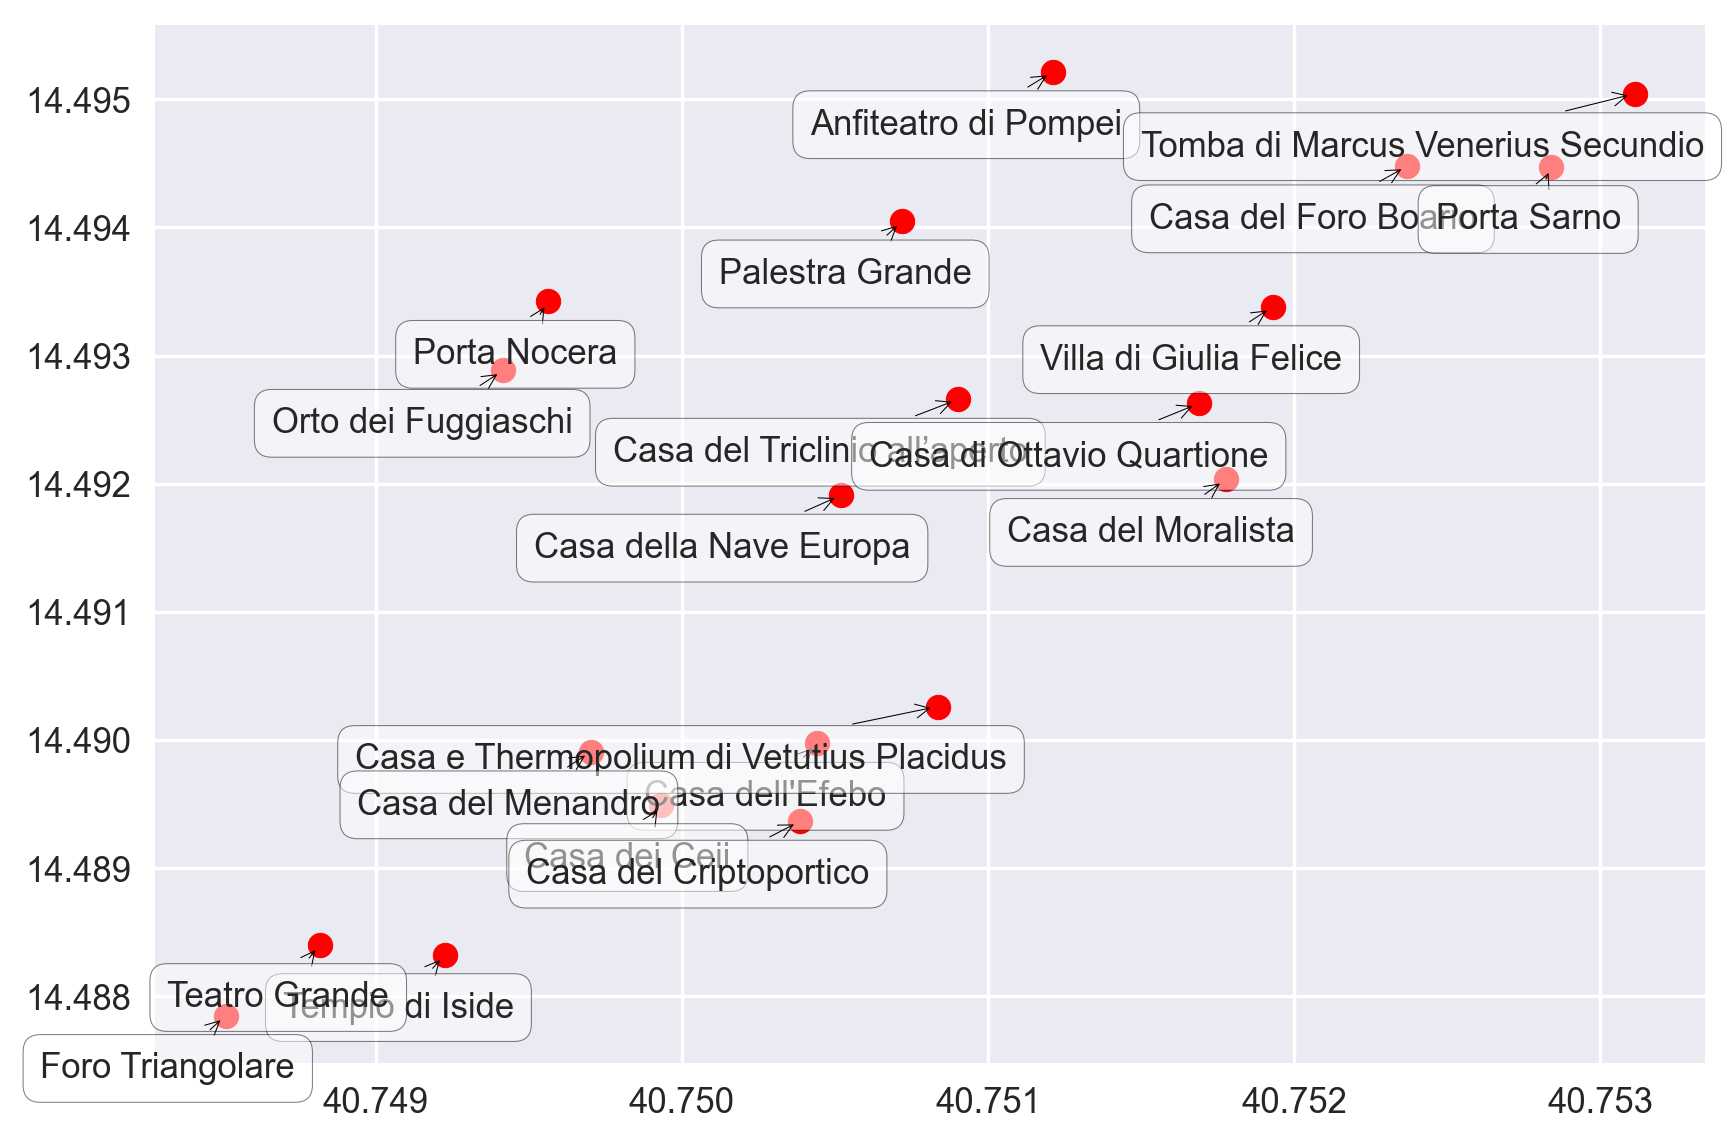

In [18]:
city_coordinates = make_cities(20)
plot_cities(city_coordinates)

In [19]:
current_generation = create_generation(list(city_coordinates.keys()),population=500)
fitness_tracking, best_guess = evolve_to_solve(current_generation, 150, 150, 70, 0.5, 3, 5, verbose=True)

Generation 5: 330
Current Best Score:  0.040445384566791205
["Casa dell'Efebo", 'Villa di Giulia Felice', 'Casa della Nave Europa', 'Casa del Triclinio all’aperto', 'Casa dei Ceii', 'Casa e Thermopolium di Vetutius Placidus', 'Teatro Grande', 'Foro Triangolare', 'Casa del Criptoportico', 'Casa del Menandro', 'Orto dei Fuggiaschi', 'Porta Nocera', 'Palestra Grande', 'Casa di Ottavio Quartione', 'Tomba di Marcus Venerius Secundio', 'Casa del Foro Boario', 'Anfiteatro di Pompei', 'Porta Sarno', 'Casa del Moralista', 'Tempio di Iside', "Casa dell'Efebo"]
Generation 10: 330
Current Best Score:  0.04239212193052677
["Casa dell'Efebo", 'Villa di Giulia Felice', 'Casa della Nave Europa', 'Casa del Triclinio all’aperto', 'Casa dei Ceii', 'Casa e Thermopolium di Vetutius Placidus', 'Teatro Grande', 'Foro Triangolare', 'Casa del Criptoportico', 'Casa del Menandro', 'Tempio di Iside', 'Casa del Moralista', 'Palestra Grande', 'Tomba di Marcus Venerius Secundio', 'Casa del Foro Boario', 'Anfiteatro 

Generation 80: 330
Current Best Score:  0.0409531779810936
["Casa dell'Efebo", 'Villa di Giulia Felice', 'Casa della Nave Europa', 'Casa del Triclinio all’aperto', 'Casa dei Ceii', 'Casa e Thermopolium di Vetutius Placidus', 'Teatro Grande', 'Foro Triangolare', 'Casa del Criptoportico', 'Casa del Menandro', 'Tempio di Iside', 'Casa del Moralista', 'Palestra Grande', 'Tomba di Marcus Venerius Secundio', 'Casa del Foro Boario', 'Anfiteatro di Pompei', 'Porta Sarno', 'Casa di Ottavio Quartione', 'Porta Nocera', 'Orto dei Fuggiaschi', "Casa dell'Efebo"]
Generation 85: 330
Current Best Score:  0.0409531779810936
["Casa dell'Efebo", 'Villa di Giulia Felice', 'Casa della Nave Europa', 'Casa del Triclinio all’aperto', 'Casa dei Ceii', 'Casa e Thermopolium di Vetutius Placidus', 'Teatro Grande', 'Foro Triangolare', 'Casa del Criptoportico', 'Casa del Menandro', 'Tempio di Iside', 'Casa del Moralista', 'Palestra Grande', 'Tomba di Marcus Venerius Secundio', 'Casa del Foro Boario', 'Anfiteatro di

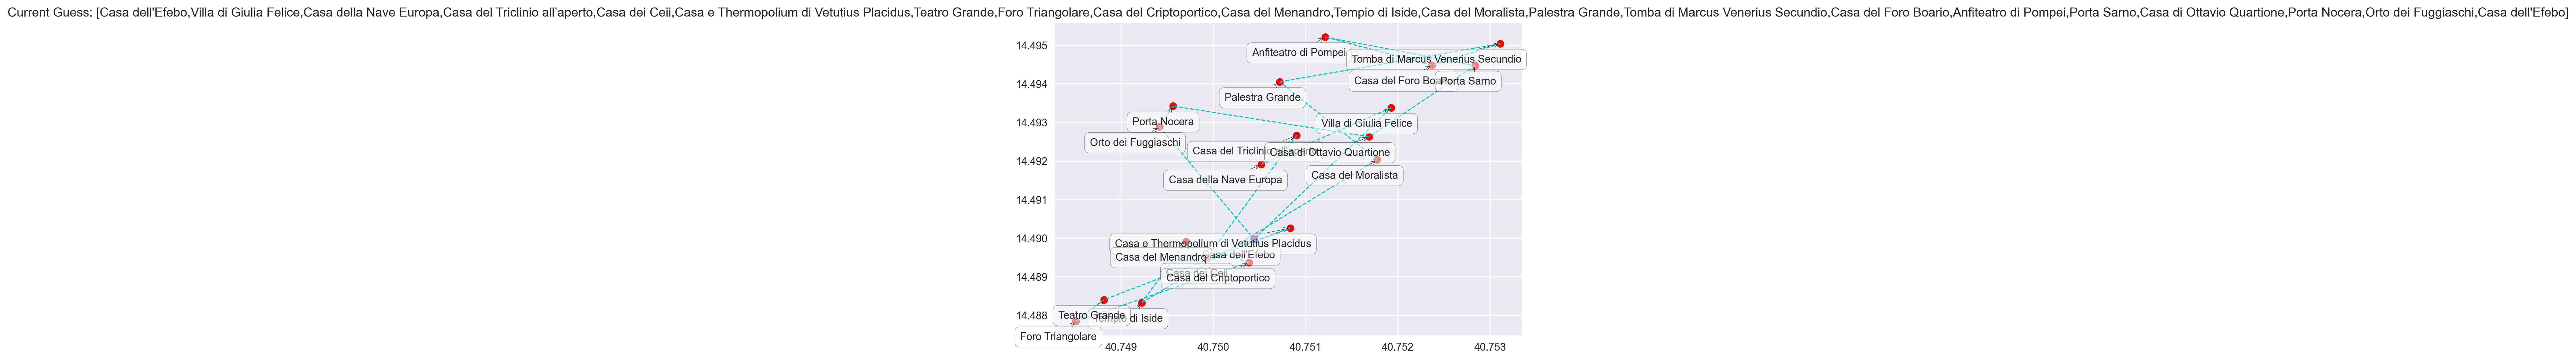

In [20]:
plot_guess(city_coordinates, best_guess)

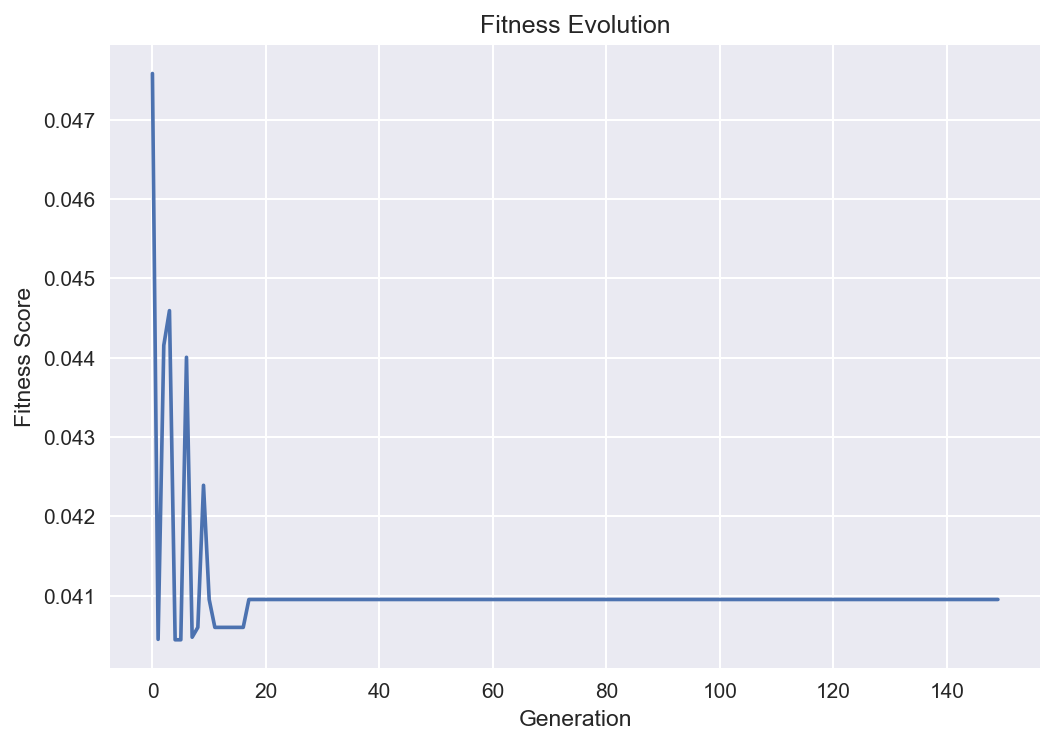

In [21]:
make_fitness_tracking_plot(fitness_tracking)

Stupendo! Ha trovato un percorso davvero bello che è piuttosto intuitivo. Inoltre è convergente VERAMENTE rapidamente. E se avessimo 50 città? Sono 3.0414e+64 permutazioni. È un numero incredibilmente alto di permutazioni. Non saremmo mai in grado di risolverlo con un approccio "normale". Proviamo il nostro.

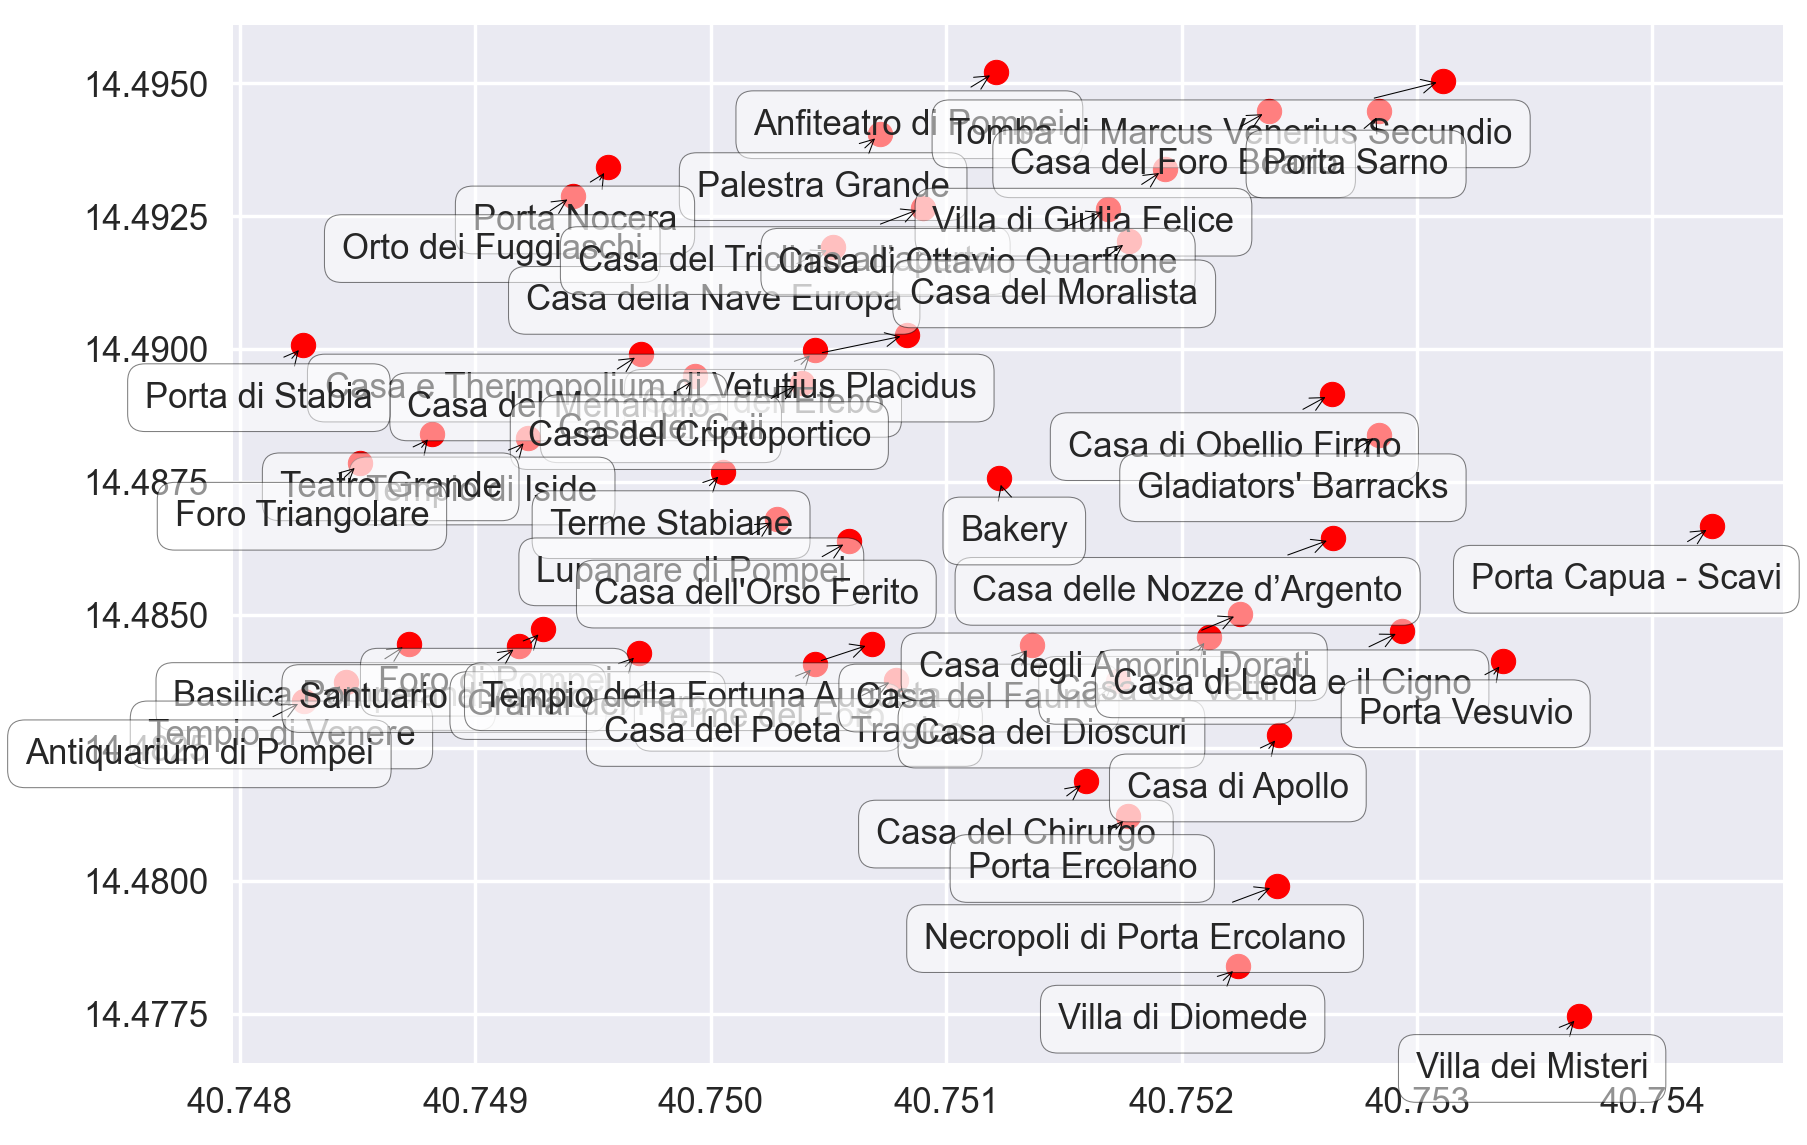

In [22]:
city_coordinates = make_cities(50)
plot_cities(city_coordinates)

In [23]:
current_generation = create_generation(list(city_coordinates.keys()),population=500)
fitness_tracking, best_guess = evolve_to_solve(current_generation, 300, 150, 70, 0.5, 3, 5, verbose=True)

Generation 5: 330
Current Best Score:  0.2284578022960016
['Villa dei Misteri', 'Necropoli di Porta Ercolano', 'Casa degli Amorini Dorati', 'Casa dei Dioscuri', 'Casa di Leda e il Cigno', 'Porta Vesuvio', 'Casa del Moralista', 'Porta Ercolano', 'Tomba di Marcus Venerius Secundio', 'Porta Capua - Scavi', 'Casa delle Nozze d’Argento', 'Orto dei Fuggiaschi', 'Casa del Triclinio all’aperto', 'Casa di Obellio Firmo', "Casa dell'Efebo", 'Anfiteatro di Pompei', 'Casa del Foro Boario', 'Antiquarium di Pompei', 'Casa del Criptoportico', 'Casa della Nave Europa', 'Porta Nocera', 'Porta di Stabia', 'Porta Sarno', "Gladiators' Barracks", 'Villa di Giulia Felice', 'Granai del Foro', 'Tempio di Venere', "Casa dell'Orso Ferito", 'Foro di Pompei', 'Santuario di Apollo', 'Lupanare di Pompei', 'Basilica Pompeiana', 'Foro Triangolare', 'Casa e Thermopolium di Vetutius Placidus', 'Casa del Fauno', 'Casa del Poeta Tragico', 'Tempio di Iside', 'Casa di Ottavio Quartione', 'Casa del Menandro', 'Palestra Gran

Generation 40: 330
Current Best Score:  0.21562073575701457
['Casa del Fauno', 'Villa dei Misteri', 'Tempio di Iside', 'Teatro Grande', 'Casa dei Vettii', 'Santuario di Apollo', 'Bakery', 'Porta Vesuvio', 'Casa degli Amorini Dorati', 'Casa della Nave Europa', 'Palestra Grande', 'Granai del Foro', 'Villa di Giulia Felice', 'Casa di Obellio Firmo', 'Casa del Moralista', 'Casa del Triclinio all’aperto', 'Casa e Thermopolium di Vetutius Placidus', 'Casa dei Dioscuri', 'Porta Ercolano', 'Antiquarium di Pompei', 'Villa di Diomede', 'Tempio di Venere', 'Basilica Pompeiana', 'Foro Triangolare', "Casa dell'Efebo", 'Terme Stabiane', 'Tomba di Marcus Venerius Secundio', 'Terme del Foro', 'Orto dei Fuggiaschi', 'Casa di Ottavio Quartione', 'Casa del Foro Boario', 'Anfiteatro di Pompei', 'Porta di Stabia', 'Necropoli di Porta Ercolano', 'Casa di Leda e il Cigno', 'Porta Capua - Scavi', 'Casa delle Nozze d’Argento', 'Casa del Criptoportico', 'Porta Nocera', 'Porta Sarno', "Gladiators' Barracks", 'Ca

Generation 75: 330
Current Best Score:  0.21562073575701457
['Casa del Fauno', 'Villa dei Misteri', 'Tempio di Iside', 'Teatro Grande', 'Casa dei Vettii', 'Santuario di Apollo', 'Bakery', 'Porta Vesuvio', 'Casa degli Amorini Dorati', 'Casa della Nave Europa', 'Palestra Grande', 'Granai del Foro', 'Villa di Giulia Felice', 'Casa di Obellio Firmo', 'Casa del Moralista', 'Casa del Triclinio all’aperto', 'Casa e Thermopolium di Vetutius Placidus', 'Casa dei Dioscuri', 'Porta Ercolano', 'Antiquarium di Pompei', 'Villa di Diomede', 'Tempio di Venere', 'Basilica Pompeiana', 'Foro Triangolare', "Casa dell'Efebo", 'Terme Stabiane', 'Tomba di Marcus Venerius Secundio', 'Terme del Foro', 'Orto dei Fuggiaschi', 'Casa di Ottavio Quartione', 'Casa del Foro Boario', 'Anfiteatro di Pompei', 'Porta di Stabia', 'Necropoli di Porta Ercolano', 'Casa di Leda e il Cigno', 'Porta Capua - Scavi', 'Casa delle Nozze d’Argento', 'Casa del Criptoportico', 'Porta Nocera', 'Porta Sarno', "Gladiators' Barracks", 'Ca

Generation 110: 330
Current Best Score:  0.21562073575701457
['Casa del Fauno', 'Villa dei Misteri', 'Tempio di Iside', 'Teatro Grande', 'Casa dei Vettii', 'Santuario di Apollo', 'Bakery', 'Porta Vesuvio', 'Casa degli Amorini Dorati', 'Casa della Nave Europa', 'Palestra Grande', 'Granai del Foro', 'Villa di Giulia Felice', 'Casa di Obellio Firmo', 'Casa del Moralista', 'Casa del Triclinio all’aperto', 'Casa e Thermopolium di Vetutius Placidus', 'Casa dei Dioscuri', 'Porta Ercolano', 'Antiquarium di Pompei', 'Villa di Diomede', 'Tempio di Venere', 'Basilica Pompeiana', 'Foro Triangolare', "Casa dell'Efebo", 'Terme Stabiane', 'Tomba di Marcus Venerius Secundio', 'Terme del Foro', 'Orto dei Fuggiaschi', 'Casa di Ottavio Quartione', 'Casa del Foro Boario', 'Anfiteatro di Pompei', 'Porta di Stabia', 'Necropoli di Porta Ercolano', 'Casa di Leda e il Cigno', 'Porta Capua - Scavi', 'Casa delle Nozze d’Argento', 'Casa del Criptoportico', 'Porta Nocera', 'Porta Sarno', "Gladiators' Barracks", 'C

Generation 145: 330
Current Best Score:  0.21562073575701457
['Casa del Fauno', 'Villa dei Misteri', 'Tempio di Iside', 'Teatro Grande', 'Casa dei Vettii', 'Santuario di Apollo', 'Bakery', 'Porta Vesuvio', 'Casa degli Amorini Dorati', 'Casa della Nave Europa', 'Palestra Grande', 'Granai del Foro', 'Villa di Giulia Felice', 'Casa di Obellio Firmo', 'Casa del Moralista', 'Casa del Triclinio all’aperto', 'Casa e Thermopolium di Vetutius Placidus', 'Casa dei Dioscuri', 'Porta Ercolano', 'Antiquarium di Pompei', 'Villa di Diomede', 'Tempio di Venere', 'Basilica Pompeiana', 'Foro Triangolare', "Casa dell'Efebo", 'Terme Stabiane', 'Tomba di Marcus Venerius Secundio', 'Terme del Foro', 'Orto dei Fuggiaschi', 'Casa di Ottavio Quartione', 'Casa del Foro Boario', 'Anfiteatro di Pompei', 'Porta di Stabia', 'Necropoli di Porta Ercolano', 'Casa di Leda e il Cigno', 'Porta Capua - Scavi', 'Casa delle Nozze d’Argento', 'Casa del Criptoportico', 'Porta Nocera', 'Porta Sarno', "Gladiators' Barracks", 'C

Generation 180: 330
Current Best Score:  0.21562073575701457
['Casa del Fauno', 'Villa dei Misteri', 'Tempio di Iside', 'Teatro Grande', 'Casa dei Vettii', 'Santuario di Apollo', 'Bakery', 'Porta Vesuvio', 'Casa degli Amorini Dorati', 'Casa della Nave Europa', 'Palestra Grande', 'Granai del Foro', 'Villa di Giulia Felice', 'Casa di Obellio Firmo', 'Casa del Moralista', 'Casa del Triclinio all’aperto', 'Casa e Thermopolium di Vetutius Placidus', 'Casa dei Dioscuri', 'Porta Ercolano', 'Antiquarium di Pompei', 'Villa di Diomede', 'Tempio di Venere', 'Basilica Pompeiana', 'Foro Triangolare', "Casa dell'Efebo", 'Terme Stabiane', 'Tomba di Marcus Venerius Secundio', 'Terme del Foro', 'Orto dei Fuggiaschi', 'Casa di Ottavio Quartione', 'Casa del Foro Boario', 'Anfiteatro di Pompei', 'Porta di Stabia', 'Necropoli di Porta Ercolano', 'Casa di Leda e il Cigno', 'Porta Capua - Scavi', 'Casa delle Nozze d’Argento', 'Casa del Criptoportico', 'Porta Nocera', 'Porta Sarno', "Gladiators' Barracks", 'C

Generation 215: 330
Current Best Score:  0.21562073575701457
['Casa del Fauno', 'Villa dei Misteri', 'Tempio di Iside', 'Teatro Grande', 'Casa dei Vettii', 'Santuario di Apollo', 'Bakery', 'Porta Vesuvio', 'Casa degli Amorini Dorati', 'Casa della Nave Europa', 'Palestra Grande', 'Granai del Foro', 'Villa di Giulia Felice', 'Casa di Obellio Firmo', 'Casa del Moralista', 'Casa del Triclinio all’aperto', 'Casa e Thermopolium di Vetutius Placidus', 'Casa dei Dioscuri', 'Porta Ercolano', 'Antiquarium di Pompei', 'Villa di Diomede', 'Tempio di Venere', 'Basilica Pompeiana', 'Foro Triangolare', "Casa dell'Efebo", 'Terme Stabiane', 'Tomba di Marcus Venerius Secundio', 'Terme del Foro', 'Orto dei Fuggiaschi', 'Casa di Ottavio Quartione', 'Casa del Foro Boario', 'Anfiteatro di Pompei', 'Porta di Stabia', 'Necropoli di Porta Ercolano', 'Casa di Leda e il Cigno', 'Porta Capua - Scavi', 'Casa delle Nozze d’Argento', 'Casa del Criptoportico', 'Porta Nocera', 'Porta Sarno', "Gladiators' Barracks", 'C

Generation 250: 330
Current Best Score:  0.21562073575701457
['Casa del Fauno', 'Villa dei Misteri', 'Tempio di Iside', 'Teatro Grande', 'Casa dei Vettii', 'Santuario di Apollo', 'Bakery', 'Porta Vesuvio', 'Casa degli Amorini Dorati', 'Casa della Nave Europa', 'Palestra Grande', 'Granai del Foro', 'Villa di Giulia Felice', 'Casa di Obellio Firmo', 'Casa del Moralista', 'Casa del Triclinio all’aperto', 'Casa e Thermopolium di Vetutius Placidus', 'Casa dei Dioscuri', 'Porta Ercolano', 'Antiquarium di Pompei', 'Villa di Diomede', 'Tempio di Venere', 'Basilica Pompeiana', 'Foro Triangolare', "Casa dell'Efebo", 'Terme Stabiane', 'Tomba di Marcus Venerius Secundio', 'Terme del Foro', 'Orto dei Fuggiaschi', 'Casa di Ottavio Quartione', 'Casa del Foro Boario', 'Anfiteatro di Pompei', 'Porta di Stabia', 'Necropoli di Porta Ercolano', 'Casa di Leda e il Cigno', 'Porta Capua - Scavi', 'Casa delle Nozze d’Argento', 'Casa del Criptoportico', 'Porta Nocera', 'Porta Sarno', "Gladiators' Barracks", 'C

Generation 285: 330
Current Best Score:  0.21562073575701457
['Casa del Fauno', 'Villa dei Misteri', 'Tempio di Iside', 'Teatro Grande', 'Casa dei Vettii', 'Santuario di Apollo', 'Bakery', 'Porta Vesuvio', 'Casa degli Amorini Dorati', 'Casa della Nave Europa', 'Palestra Grande', 'Granai del Foro', 'Villa di Giulia Felice', 'Casa di Obellio Firmo', 'Casa del Moralista', 'Casa del Triclinio all’aperto', 'Casa e Thermopolium di Vetutius Placidus', 'Casa dei Dioscuri', 'Porta Ercolano', 'Antiquarium di Pompei', 'Villa di Diomede', 'Tempio di Venere', 'Basilica Pompeiana', 'Foro Triangolare', "Casa dell'Efebo", 'Terme Stabiane', 'Tomba di Marcus Venerius Secundio', 'Terme del Foro', 'Orto dei Fuggiaschi', 'Casa di Ottavio Quartione', 'Casa del Foro Boario', 'Anfiteatro di Pompei', 'Porta di Stabia', 'Necropoli di Porta Ercolano', 'Casa di Leda e il Cigno', 'Porta Capua - Scavi', 'Casa delle Nozze d’Argento', 'Casa del Criptoportico', 'Porta Nocera', 'Porta Sarno', "Gladiators' Barracks", 'C

Current Guess: [Casa del Fauno,Villa dei Misteri,Tempio di Iside,Teatro Grande,Casa dei Vettii,Santuario di Apollo,Bakery,Porta Vesuvio,Casa degli Amorini Dorati,Casa della Nave Europa,Palestra Grande,Granai del Foro,Villa di Giulia Felice,Casa di Obellio Firmo,Casa del Moralista,Casa del Triclinio all’aperto,Casa e Thermopolium di Vetutius Placidus,Casa dei Dioscuri,Porta Ercolano,Antiquarium di Pompei,Villa di Diomede,Tempio di Venere,Basilica Pompeiana,Foro Triangolare,Casa dell'Efebo,Terme Stabiane,Tomba di Marcus Venerius Secundio,Terme del Foro,Orto dei Fuggiaschi,Casa di Ottavio Quartione,Casa del Foro Boario,Anfiteatro di Pompei,Porta di Stabia,Necropoli di Porta Ercolano,Casa di Leda e il Cigno,Porta Capua - Scavi,Casa delle Nozze d’Argento,Casa del Criptoportico,Porta Nocera,Porta Sarno,Gladiators' Barracks,Casa del Poeta Tragico,Casa dell'Orso Ferito,Casa dei Ceii,Casa del Menandro,Foro di Pompei,Lupanare di Pompei,Tempio della Fortuna Augusta,Casa di Apollo,Casa del Chirurg

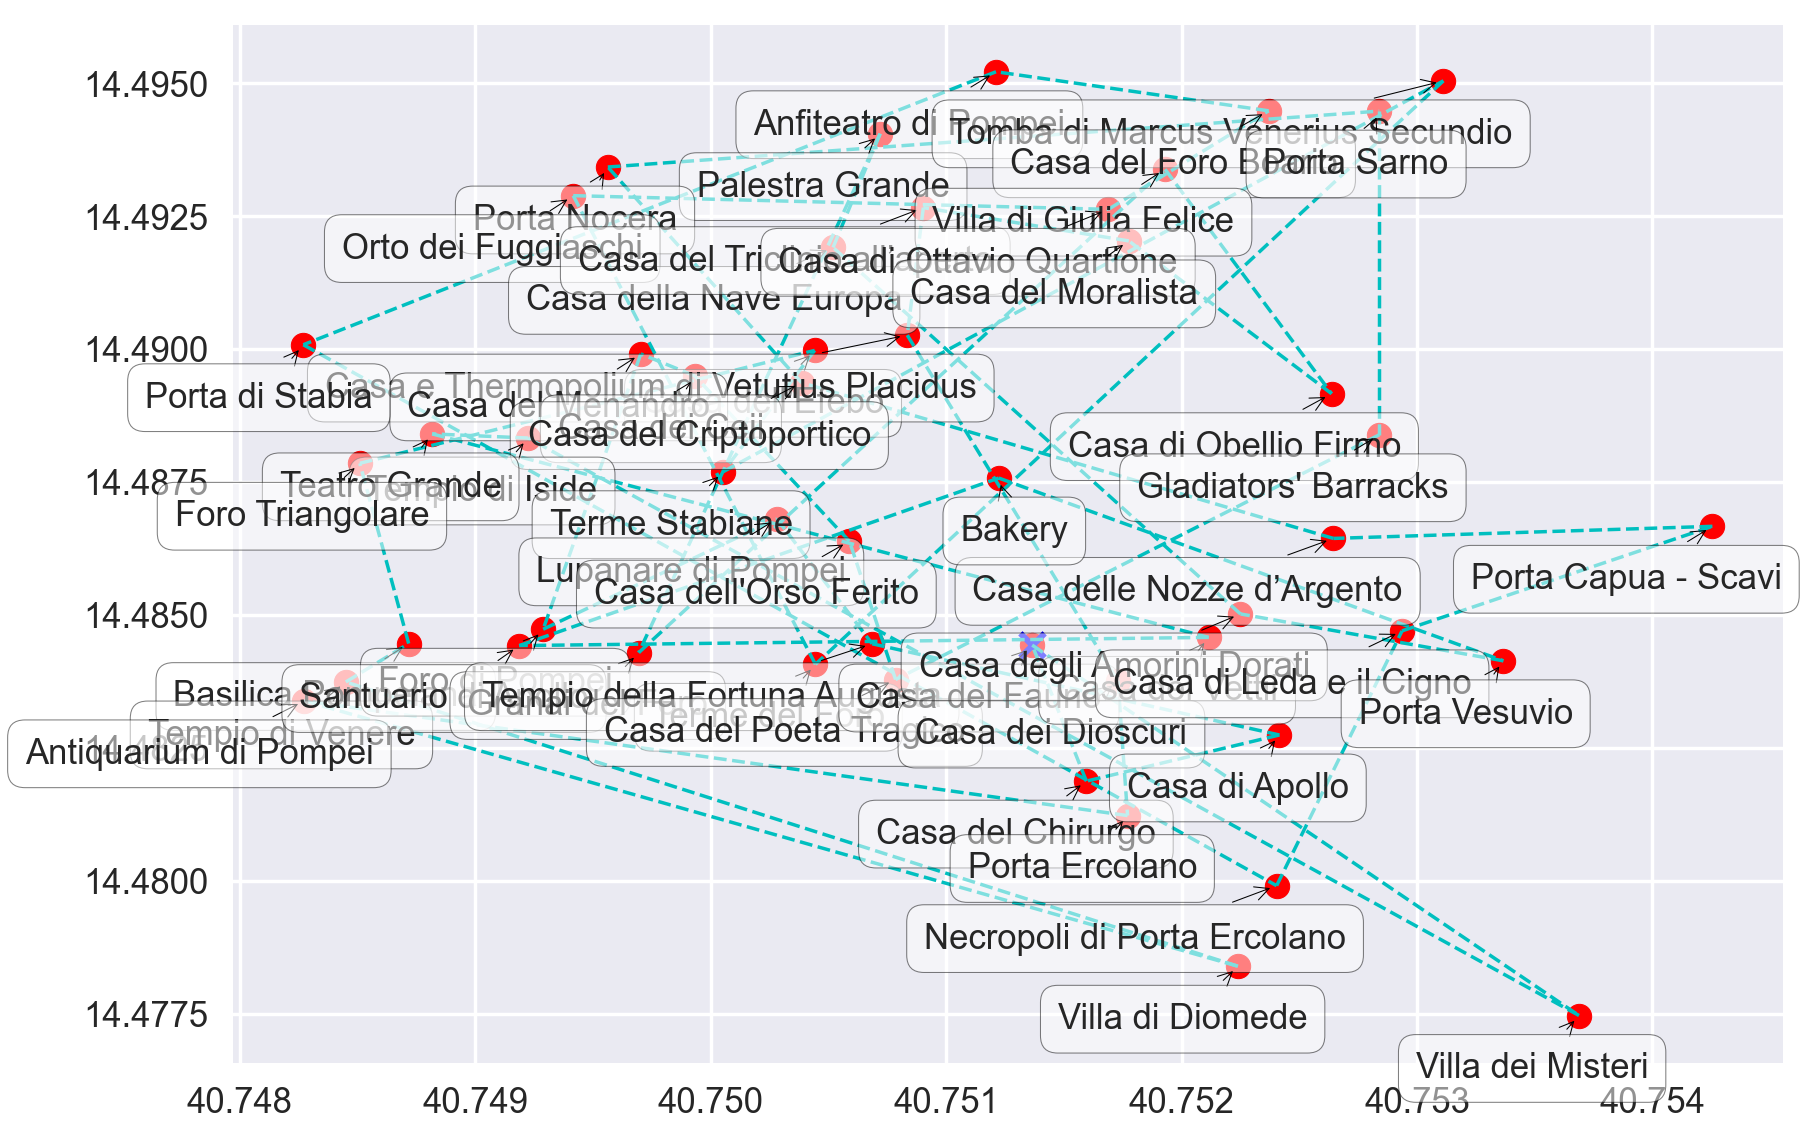

In [24]:
plot_guess(city_coordinates, best_guess, guess_in_title=False)

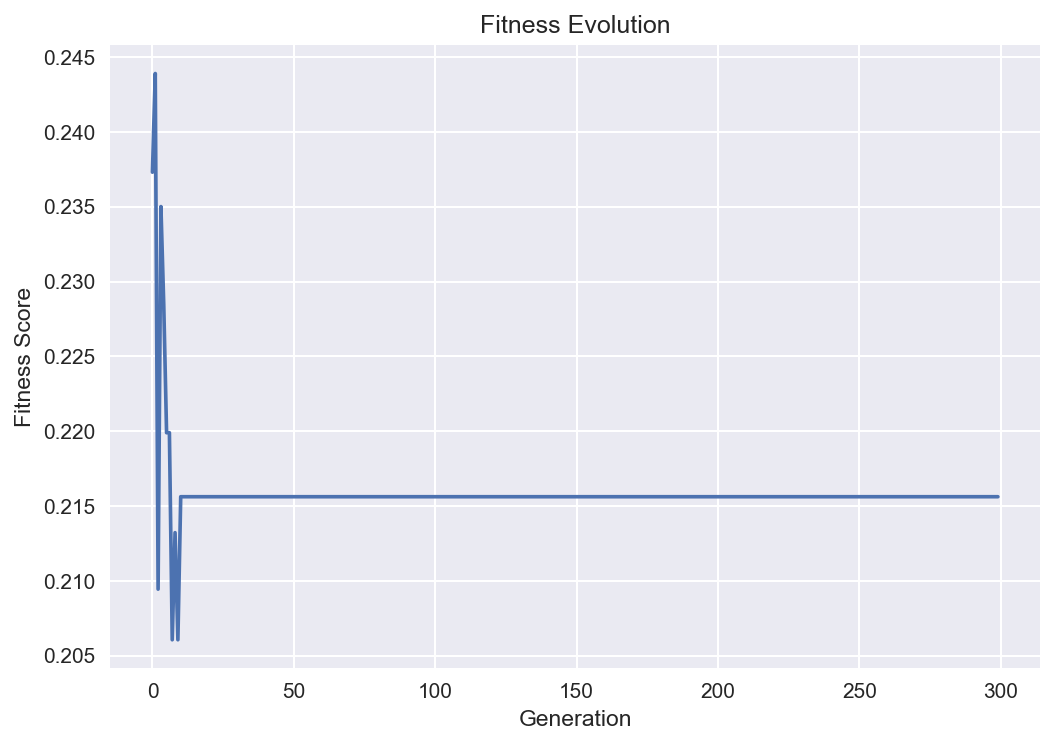

In [25]:
make_fitness_tracking_plot(fitness_tracking)

Guarda che percorso fantastico! Quando guardi solo le città senza percorso, sembra un pasticcio. Con questo algoritmo in atto, ora possiamo vedere un percorso facile e sembra così naturale. Inoltre, nonostante ci fossero 10^64 permutazioni... questo è stato eseguito in pochi secondi e l'ha risolto per noi. Ora, questa non è la migliore risposta ASSOLUTA, è un'approssimazione. È possibile che siamo solo vicini alla risposta migliore. Ma questo è un piccolo prezzo da pagare per essere in grado di rispondere alla domanda così rapidamente.